In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
dataset = pd.read_csv('/Users/chirath/Python/IIT/Waste_Management_System-DSGP-/ALL/Dataset22-24_cleaned.csv')

In [5]:
# Display the first 5 rows of the dataset
print(dataset.head())

    Dump Date             Route    Muster  SOW Wastage Amount (Kg)  \
0  2022-01-01     01 - VILAWALA  KOHUWALA                   3200.0   
1  2022-01-01   02 - DUTUGAMUNU  KOHUWALA                   1820.0   
2  2022-01-01  02/03 - EKABADDA  KOHUWALA                   2150.0   
3  2022-01-01     03 - KOHUWALA  KOHUWALA                   3480.0   
4  2022-01-01   04 - KALUBOWILA  NEDIMALA                   2380.0   

   MSW Wastage Amount (Kg)  
0                      0.0  
1                      0.0  
2                    970.0  
3                      0.0  
4                      0.0  


In [3]:
# identify the shape of the dataset
print("The number of rows in the dataset is: ", dataset.shape[0])
print("The number of columns in the dataset is: ", dataset.shape[1])

The number of rows in the dataset is:  24181
The number of columns in the dataset is:  5


In [4]:
# identify the data types of the columns (features)
print(dataset.dtypes)  

Dump Date                   object
Route                       object
Muster                      object
SOW Wastage Amount (Kg)    float64
MSW Wastage Amount (Kg)    float64
dtype: object


In [6]:
# convert the 'Dump Date' column to datetime format
dataset['Dump Date'] = pd.to_datetime(dataset['Dump Date'])

In [8]:
# identify the data types of the columns (features) after converting 'Dump Date' to datetime format
print(dataset.dtypes)

Dump Date                  datetime64[ns]
Route                              object
Muster                             object
SOW Wastage Amount (Kg)           float64
MSW Wastage Amount (Kg)           float64
dtype: object


In [9]:
# add new columns as 'Year', 'Month', 'Day of the week', Week Number'
dataset['Year'] = dataset['Dump Date'].dt.year
dataset['Month'] = dataset['Dump Date'].dt.month
dataset['Day of the week'] = dataset['Dump Date'].dt.dayofweek
dataset['Week Number'] = dataset['Dump Date'].dt.week

/var/folders/tt/5yrxvg9j67b87ts0381v3w7h0000gn/T/ipykernel_67096/2967592777.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset['Week Number'] = dataset['Dump Date'].dt.week


In [10]:
# Display the first 5 rows of the dataset after adding the new columns
print(dataset.head())

   Dump Date             Route    Muster  SOW Wastage Amount (Kg)  \
0 2022-01-01     01 - VILAWALA  KOHUWALA                   3200.0   
1 2022-01-01   02 - DUTUGAMUNU  KOHUWALA                   1820.0   
2 2022-01-01  02/03 - EKABADDA  KOHUWALA                   2150.0   
3 2022-01-01     03 - KOHUWALA  KOHUWALA                   3480.0   
4 2022-01-01   04 - KALUBOWILA  NEDIMALA                   2380.0   

   MSW Wastage Amount (Kg)  Year  Month  Day of the week  Week Number  
0                      0.0  2022      1                5           52  
1                      0.0  2022      1                5           52  
2                    970.0  2022      1                5           52  
3                      0.0  2022      1                5           52  
4                      0.0  2022      1                5           52  


In [11]:
# identify the data types of the columns (features) after adding the new columns
print(dataset.dtypes)

Dump Date                  datetime64[ns]
Route                              object
Muster                             object
SOW Wastage Amount (Kg)           float64
MSW Wastage Amount (Kg)           float64
Year                                int64
Month                               int64
Day of the week                     int64
Week Number                         int64
dtype: object


In [ ]:
# add a new column (MSW_Collected) to the data
dataset['MSW_Collected'] = dataset['MSW Wastage Amount (Kg)'].apply(lambda x: 1 if x > 0 else 0)


In [12]:
# add a new column (SOW_Collected) to the data
dataset['SOW_Collected'] = dataset['SOW Wastage Amount (Kg)'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
# Display the first 5 rows of the dataset after adding the new columns
print(dataset.head())

   Dump Date             Route    Muster  SOW Wastage Amount (Kg)  \
0 2022-01-01     01 - VILAWALA  KOHUWALA                   3200.0   
1 2022-01-01   02 - DUTUGAMUNU  KOHUWALA                   1820.0   
2 2022-01-01  02/03 - EKABADDA  KOHUWALA                   2150.0   
3 2022-01-01     03 - KOHUWALA  KOHUWALA                   3480.0   
4 2022-01-01   04 - KALUBOWILA  NEDIMALA                   2380.0   

   MSW Wastage Amount (Kg)  Year  Month  Day of the week  Week Number  \
0                      0.0  2022      1                5           52   
1                      0.0  2022      1                5           52   
2                    970.0  2022      1                5           52   
3                      0.0  2022      1                5           52   
4                      0.0  2022      1                5           52   

   SOW_Collected  
0              1  
1              1  
2              1  
3              1  
4              1  


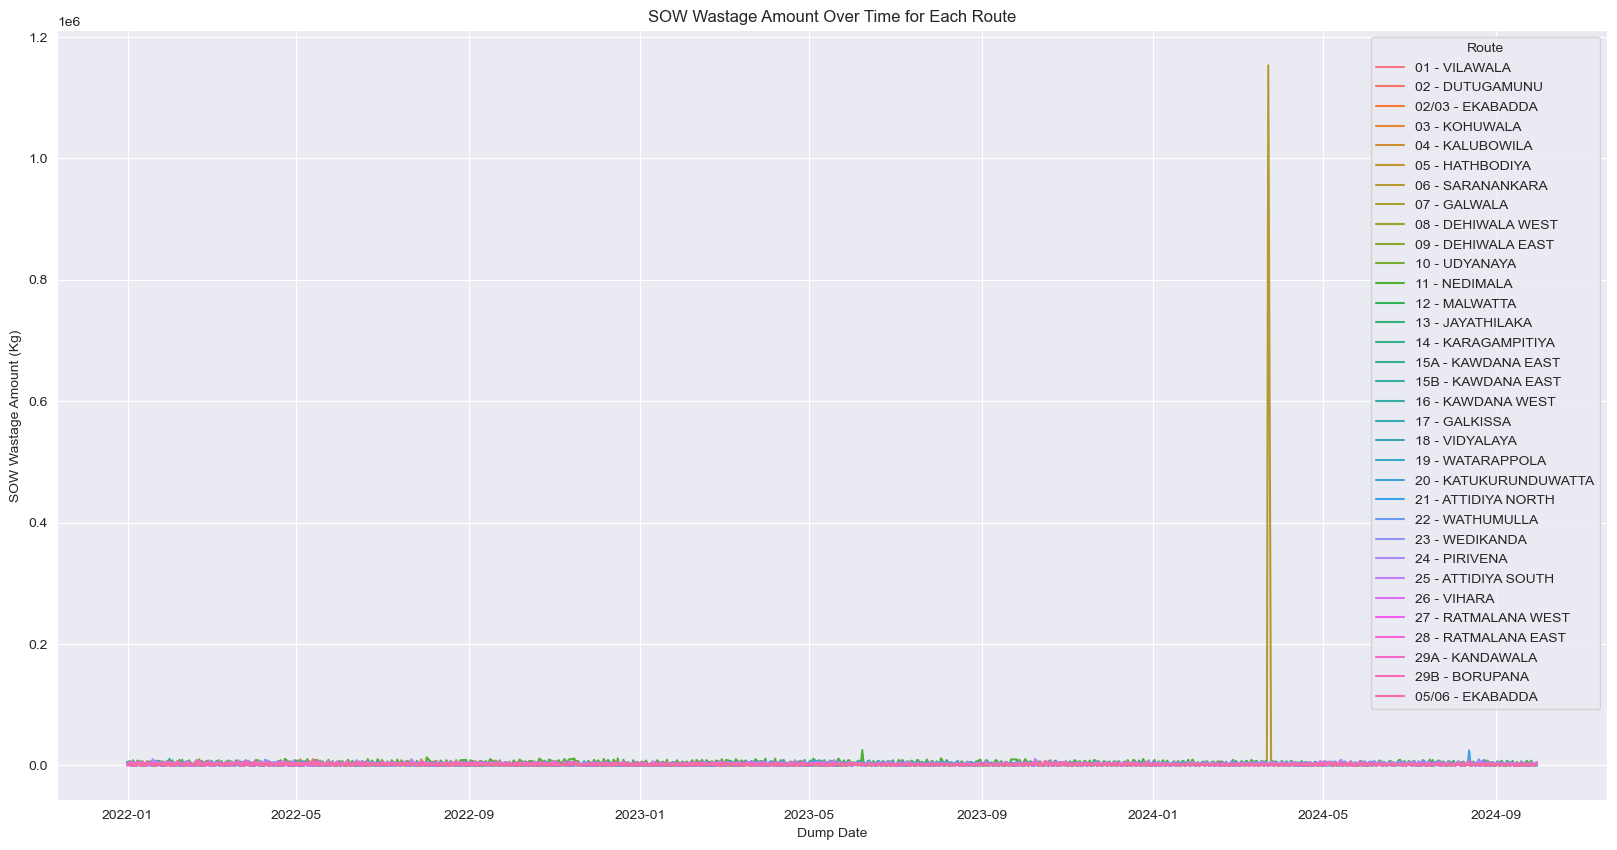

In [14]:
# plot the sow wastage amount over time for each 
plt.figure(figsize=(20, 10))
sns.lineplot(x='Dump Date', y='SOW Wastage Amount (Kg)', hue='Route', data=dataset)
plt.title('SOW Wastage Amount Over Time for Each Route')
plt.show()

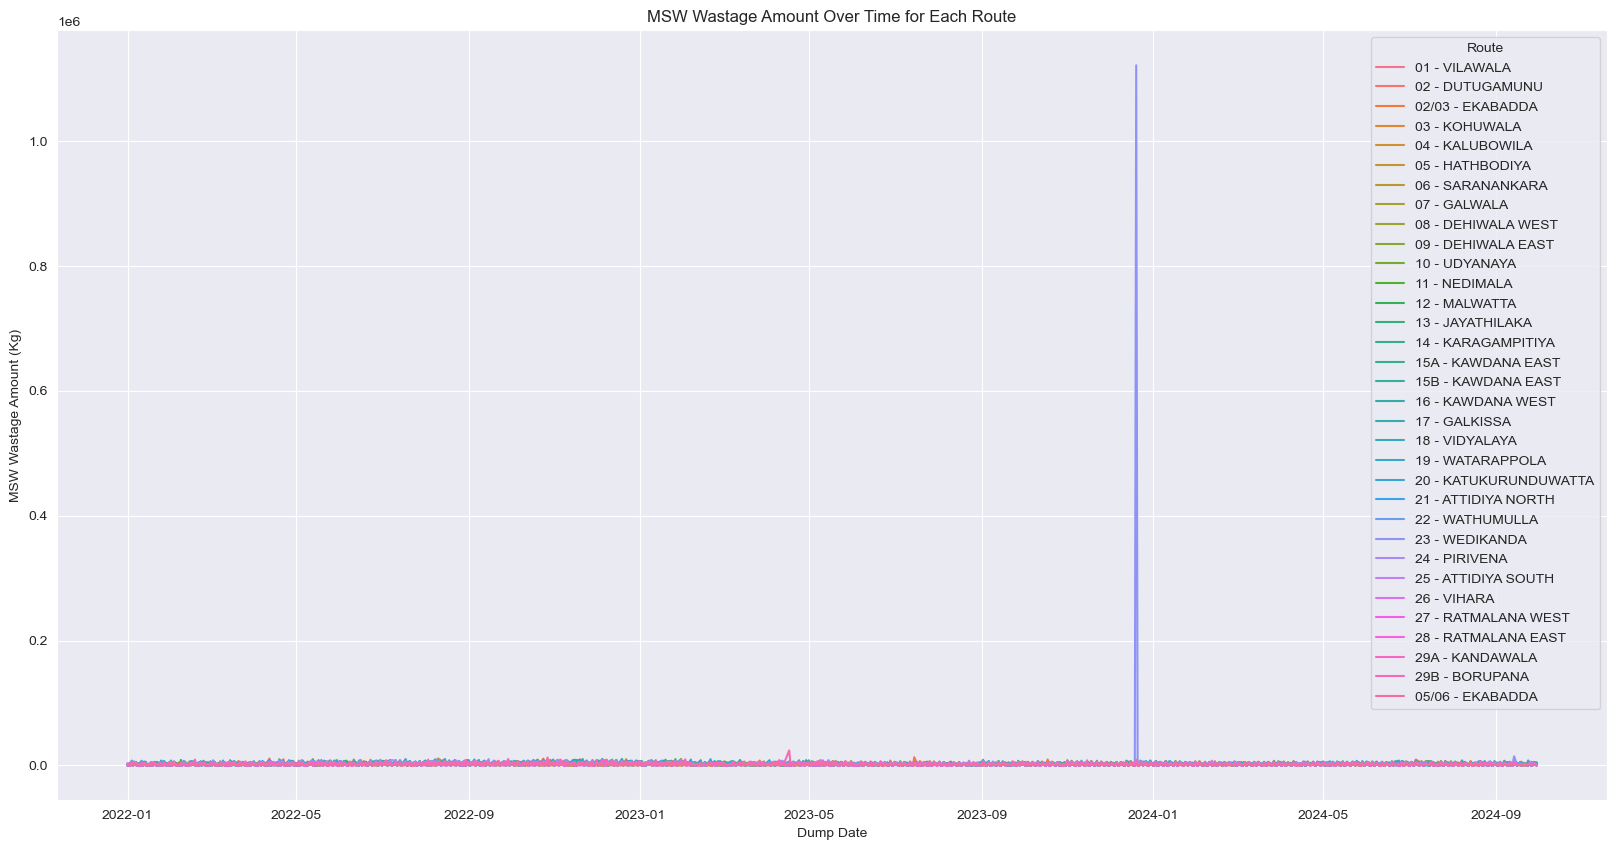

In [15]:
# plot the msw wastage amount over time for each route
plt.figure(figsize=(20, 10))
sns.lineplot(x='Dump Date', y='MSW Wastage Amount (Kg)', hue='Route', data=dataset)
plt.title('MSW Wastage Amount Over Time for Each Route')
plt.show()

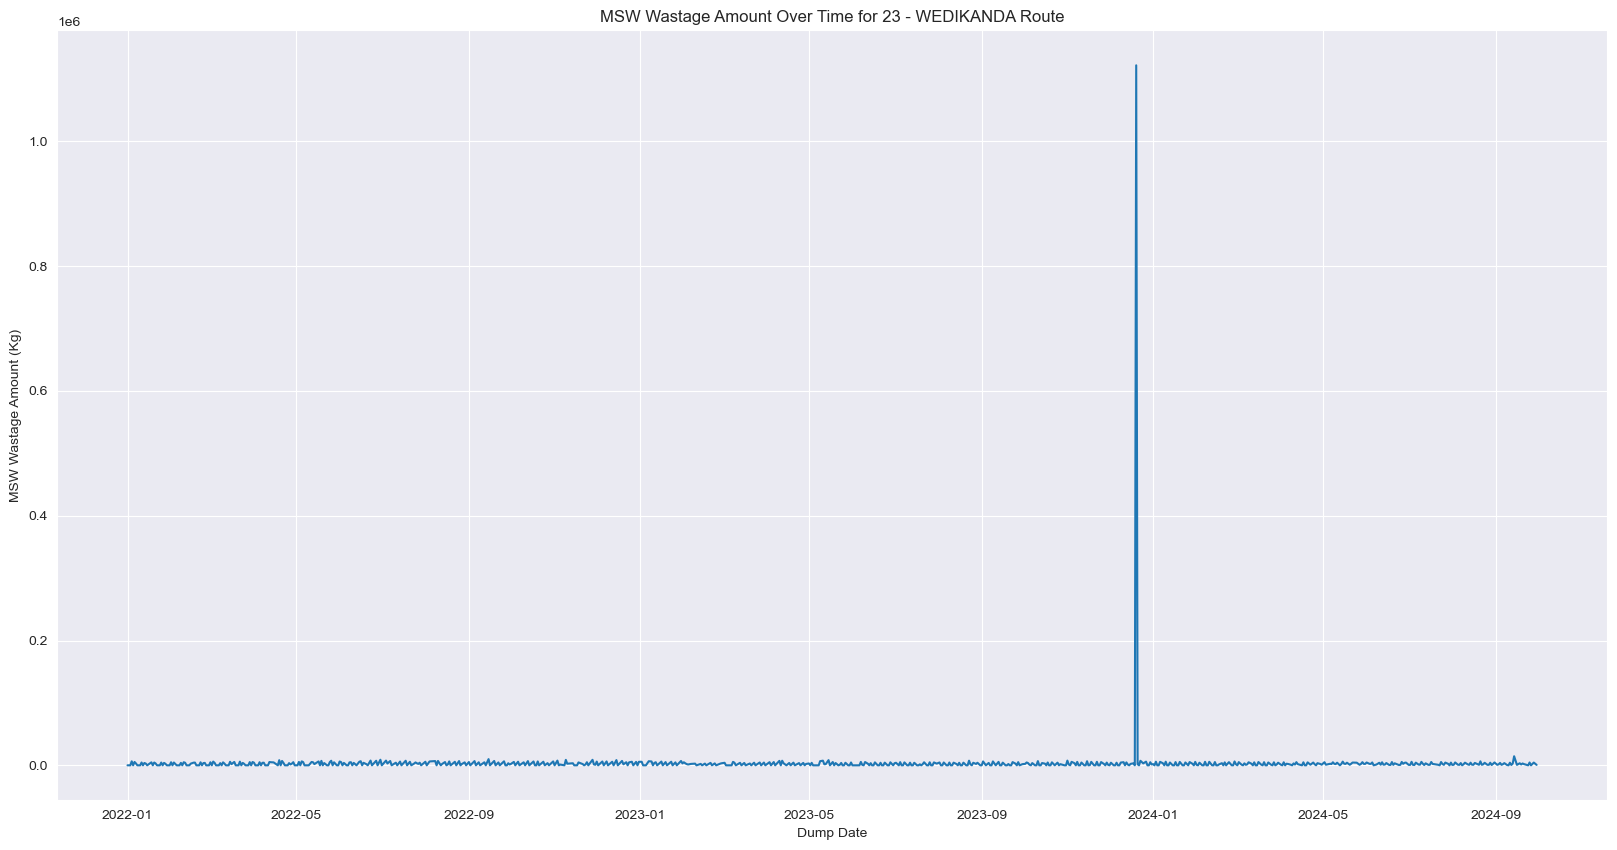

In [16]:
# plot the msw wastage amount over time for 23 - WEDIKANDA route
plt.figure(figsize=(20, 10))
sns.lineplot(x='Dump Date', y='MSW Wastage Amount (Kg)', data=dataset[dataset['Route'] == '23 - WEDIKANDA'])
plt.title('MSW Wastage Amount Over Time for 23 - WEDIKANDA Route')
plt.show()

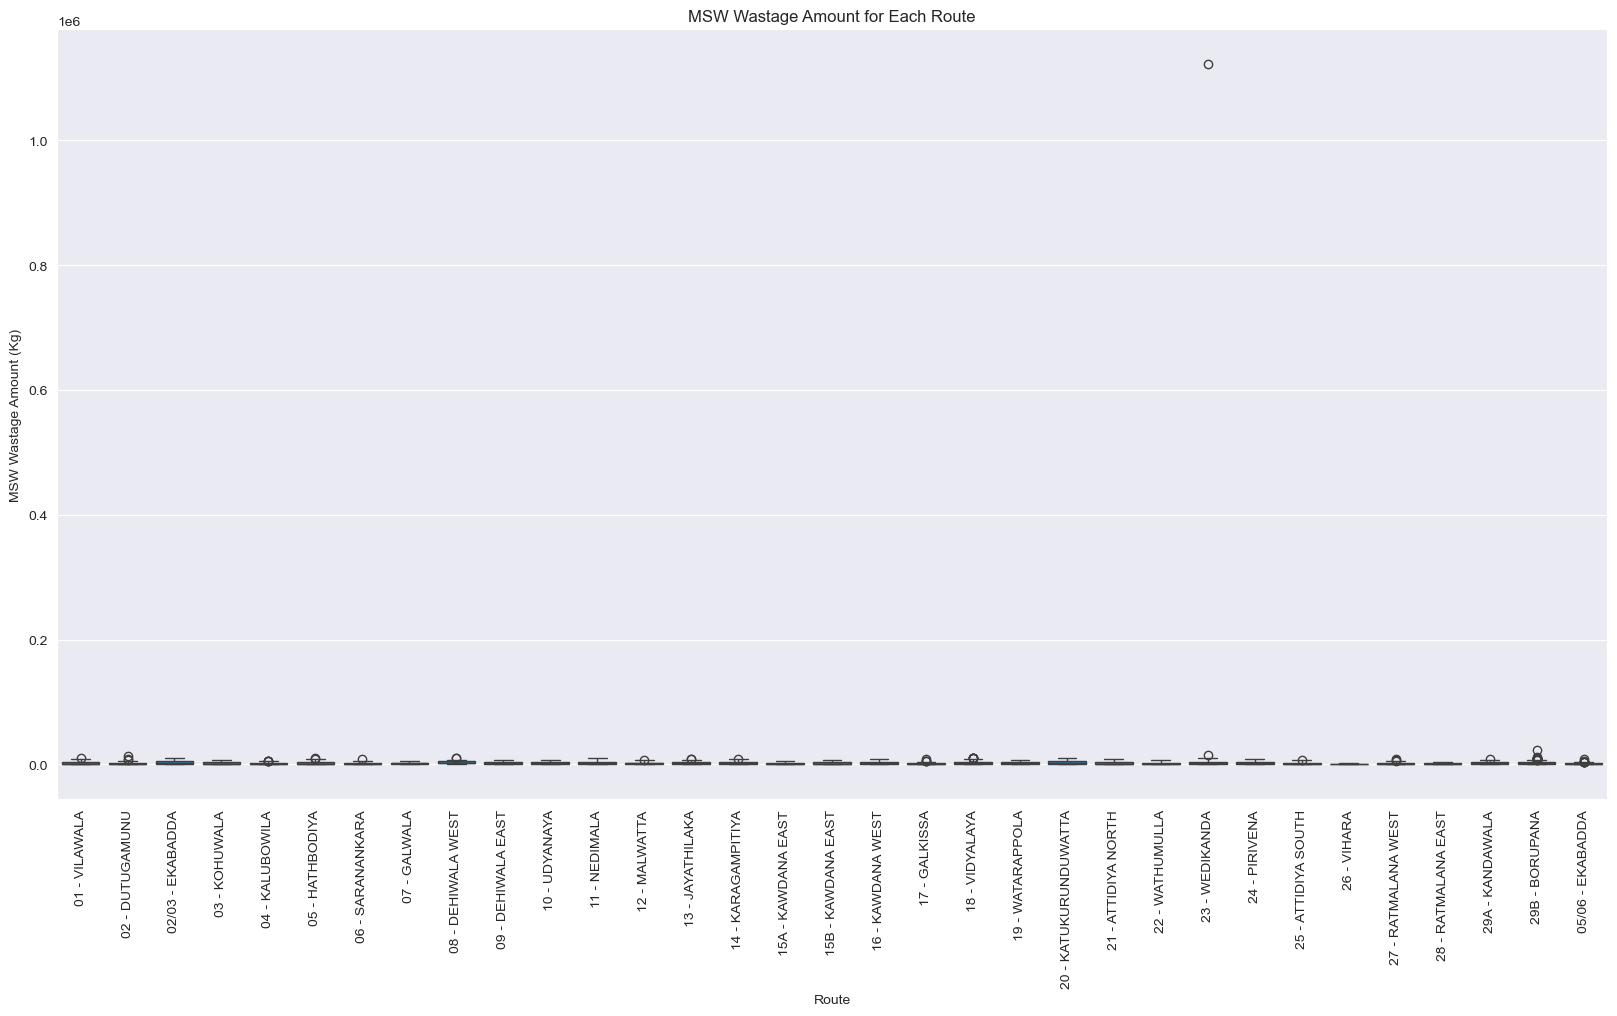

In [17]:
# box plot the msw wastage amount for each route
plt.figure(figsize=(20, 10))
sns.boxplot(x='Route', y='MSW Wastage Amount (Kg)', data=dataset)
plt.title('MSW Wastage Amount for Each Route')
plt.xticks(rotation=90)
plt.show()

In [18]:
# hiehest msw wastage amount recorded date?
print(dataset.loc[dataset['MSW Wastage Amount (Kg)'].idxmax()])

# highest sow wastage amount recorded date?
print(dataset.loc[dataset['SOW Wastage Amount (Kg)'].idxmax()])

Dump Date                  2023-12-20 00:00:00
Route                           23 - WEDIKANDA
Muster                                    R 01
SOW Wastage Amount (Kg)                    0.0
MSW Wastage Amount (Kg)              1121753.0
Year                                      2023
Month                                       12
Day of the week                              2
Week Number                                 51
SOW_Collected                                0
Name: 16624, dtype: object
Dump Date                  2024-03-23 00:00:00
Route                         06 - SARANANKARA
Muster                             SARANANKARA
SOW Wastage Amount (Kg)              1153316.0
MSW Wastage Amount (Kg)                    0.0
Year                                      2024
Month                                        3
Day of the week                              5
Week Number                                 12
SOW_Collected                                1
Name: 19176, dtype: object


Remove the extremely anomalous data points

In [19]:
# Identify the outliers
outlier_indices = dataset[(dataset['Dump Date'] == '2023-12-20') & (dataset['Route'] == '23 - WEDIKANDA') & (dataset['Muster'] == 'R 01')].index
outlier_indices = outlier_indices.append(dataset[(dataset['Dump Date'] == '2024-03-23') & (dataset['Route'] == '06 - SARANANKARA') & (dataset['Muster'] == 'SARANANKARA')].index)

# Calculate the average for the first three months of 2024 for each route and muster
average_sow_saranankara = dataset[(dataset['Dump Date'] < '2024-04-01') & (dataset['Dump Date'] >= '2024-01-01') & (dataset['Route'] == '06 - SARANANKARA') & (dataset['Muster'] == 'SARANANKARA')]['SOW Wastage Amount (Kg)'].mean()
average_msw_wedikanda = dataset[(dataset['Dump Date'] < '2024-04-01') & (dataset['Dump Date'] >= '2024-01-01') & (dataset['Route'] == '23 - WEDIKANDA') & (dataset['Muster'] == 'R 01')]['MSW Wastage Amount (Kg)'].mean()

# Replace the outliers with the average values
dataset.loc[(dataset['Dump Date'] == '2023-12-20') & (dataset['Route'] == '23 - WEDIKANDA') & (dataset['Muster'] == 'R 01'), 'MSW Wastage Amount (Kg)'] = average_msw_wedikanda
dataset.loc[(dataset['Dump Date'] == '2024-03-23') & (dataset['Route'] == '06 - SARANANKARA') & (dataset['Muster'] == 'SARANANKARA'), 'SOW Wastage Amount (Kg)'] = average_sow_saranankara


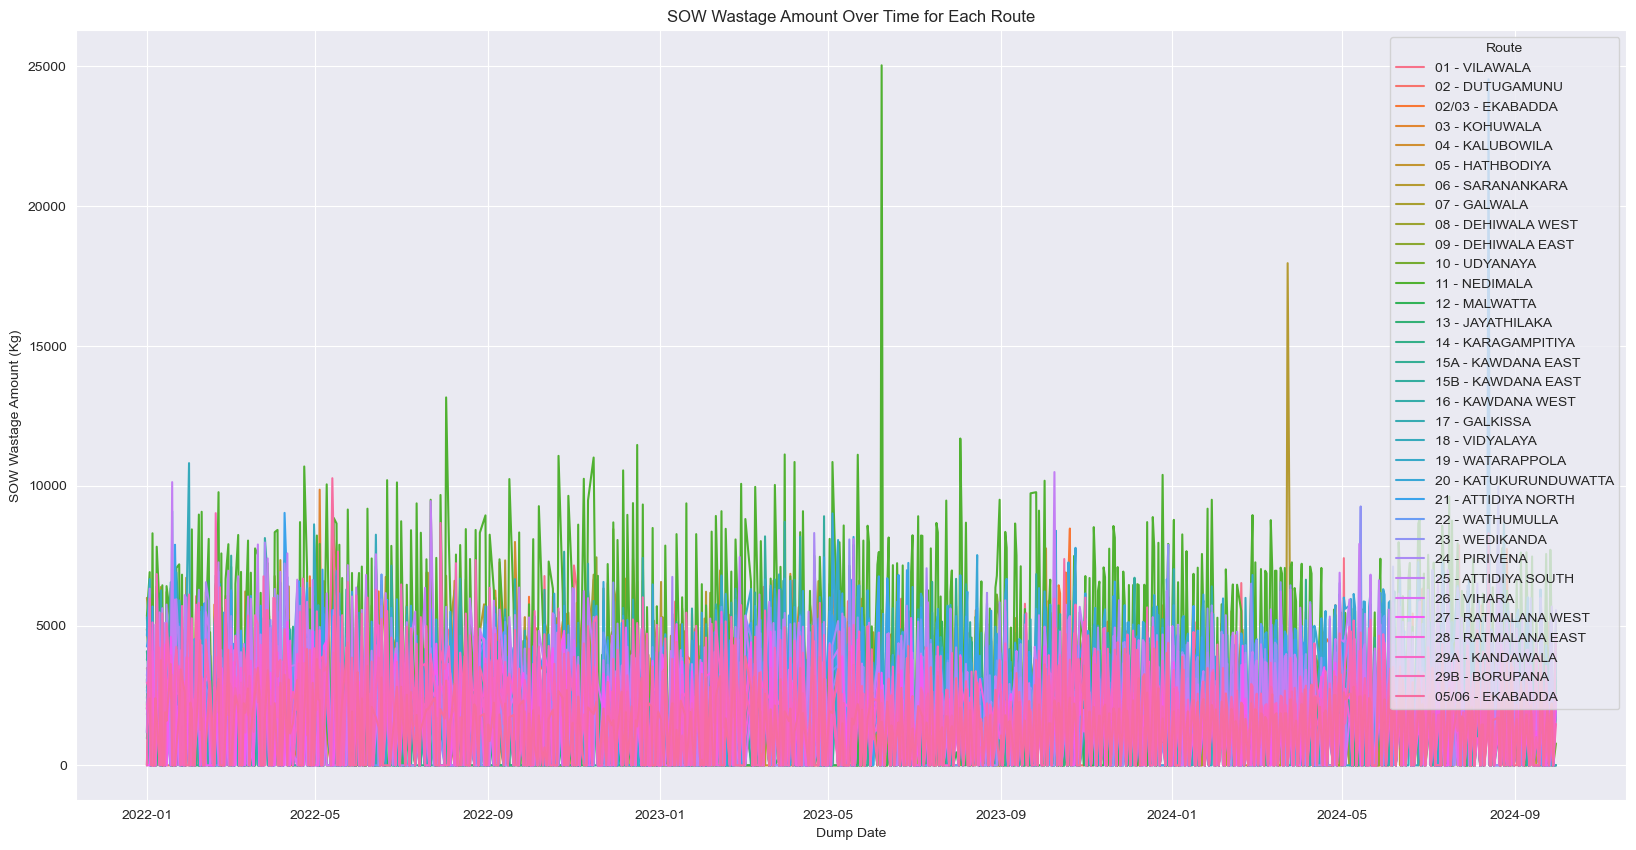

In [20]:
# plot the sow wastage amount over time for each route
plt.figure(figsize=(20, 10))
sns.lineplot(x='Dump Date', y='SOW Wastage Amount (Kg)', hue='Route', data=dataset)
plt.title('SOW Wastage Amount Over Time for Each Route')
plt.show()

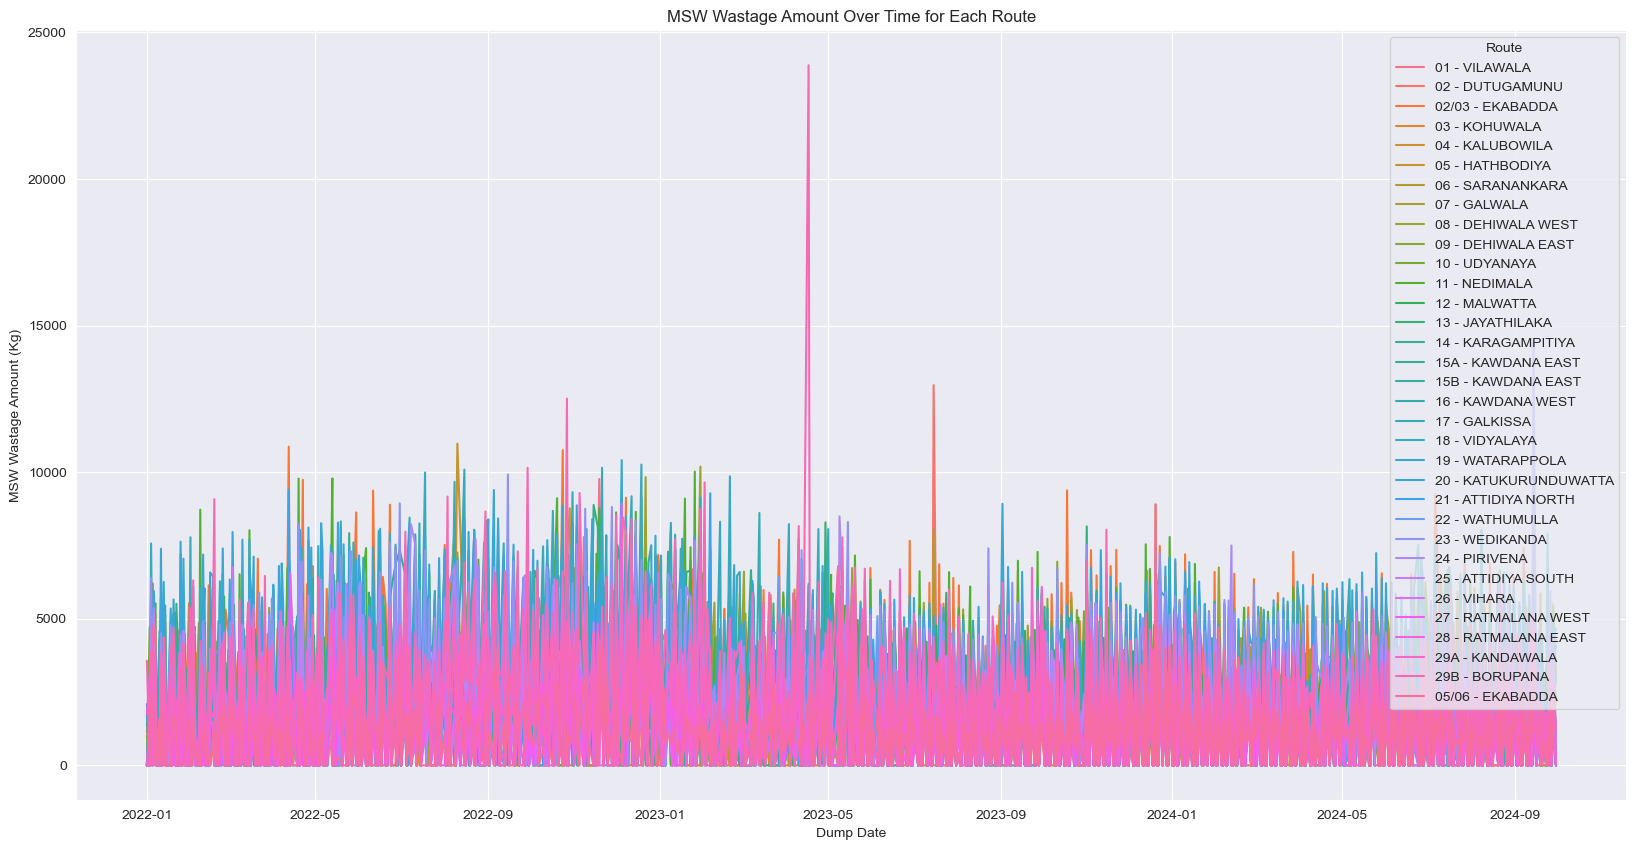

In [21]:
# plot the msw wastage amount over time for each route
plt.figure(figsize=(20, 10))
sns.lineplot(x='Dump Date', y='MSW Wastage Amount (Kg)', hue='Route', data=dataset)
plt.title('MSW Wastage Amount Over Time for Each Route')
plt.show()

In [22]:
# identify sow wastage amounts above 15000 index with there route and month
print(dataset[(dataset['SOW Wastage Amount (Kg)'] > 12000)][['Route', 'Month']])

                     Route  Month
5216         11 - NEDIMALA      8
11494        11 - NEDIMALA      6
19176     06 - SARANANKARA      3
22943  21 - ATTIDIYA NORTH      8


In [23]:
# identify msw wastage amounts above 15000 index with there route and month
print(dataset[(dataset['MSW Wastage Amount (Kg)'] > 12000)][['Route', 'Month']])

                 Route  Month
6896    29B - BORUPANA     10
10338   29B - BORUPANA      4
12465  02 - DUTUGAMUNU      7
23809   23 - WEDIKANDA      9


In [24]:
# replace the sow wastage amounts above 12000 with the average sow wastage amount for each route and month
for index in dataset[(dataset['SOW Wastage Amount (Kg)'] > 12000)].index:
    route = dataset.loc[index, 'Route']
    month = dataset.loc[index, 'Month']
    average_sow = dataset[(dataset['Route'] == route) & (dataset['Month'] == month)]['SOW Wastage Amount (Kg)'].mean()
    dataset.loc[index, 'SOW Wastage Amount (Kg)'] = average_sow

In [25]:
# replace the msw wastage amounts above 12000 with the average msw wastage amount for each route and month
for index in dataset[(dataset['MSW Wastage Amount (Kg)'] > 12000)].index:
    route = dataset.loc[index, 'Route']
    month = dataset.loc[index, 'Month']
    average_msw = dataset[(dataset['Route'] == route) & (dataset['Month'] == month)]['MSW Wastage Amount (Kg)'].mean()
    dataset.loc[index, 'MSW Wastage Amount (Kg)'] = average_msw

In [26]:
# order the dataset by 'Dump Date'
data = dataset.sort_values(by='Dump Date')

In [ ]:
# save the cleaned data to a new csv file
data.to_csv('/Users/chirath/Python/IIT/Waste_Management_System-DSGP-/ALL/Dataset22-24_cleaned_model.csv', index=False)